# **SATRIA DATA 2025**

**Team Ihre einzige grenze ist ihr verstand**

## **Data Understanding**

### 1. Deskripsi Dataset

Dataset yang digunakan berasal dari **kompetisi Satria Data 2025 (Big Data Challenge)**, dengan fokus pada **analisis emosi manusia**.
Dataset ini berisi kumpulan data video dan label emosi.

* **Sumber data**: panitia kompetisi Satria Data.
* **Format**: CSV.
* **Jumlah record**: 803.
* **Tujuan utama**: membangun model machine learning untuk mengklasifikasikan emosi berdasarkan fitur yang tersedia.

### 2. Struktur Data

Berdasarkan inspeksi awal, dataset memiliki beberapa kolom penting, di antaranya:

* `id` → ID unik untuk setiap data.
* `video` → URL video yang menjadi sumber data.
* `emotion_clean` → Label emosi (target variabel).
* Kolom tambahan (fitur numerik/kategorikal lainnya) yang akan digunakan dalam analisis.

### 3. Kualitas Data

* **Missing values**: terdapat sejumlah nilai kosong di beberapa kolom yang perlu ditangani.
* **Duplikasi**: terdapat kemungkinan duplikasi data pada kolom `video`.
* **Konsistensi**: kolom URL video memiliki format yang tidak seragam, sehingga perlu dilakukan normalisasi.

### 4. Label Emosi

Label target (`emotion_clean`) direpresentasikan dalam bentuk angka 0–7 dengan arti sebagai berikut:

| Label | Emosi    |
| ----- | -------- |
| 0     | Proud    |
| 1     | Trust    |
| 2     | Joy      |
| 3     | Surprise |
| 4     | Neutral  |
| 5     | Sadness  |
| 6     | Fear     |
| 7     | Anger    |

### 5. Korelasi dan Pola Awal

* Fitur numerik tertentu menunjukkan adanya korelasi satu sama lain.
* Video yang sama bisa muncul di dataset train dan test, sehingga perlu diperhatikan agar tidak terjadi **data leakage**.
* Insight awal: distribusi label yang tidak seimbang bisa memengaruhi performa model baseline.

### 6. Kesimpulan Sementara

* Dataset memiliki informasi yang cukup untuk membangun model klasifikasi emosi.
* Terdapat potensi masalah **missing values, duplikasi, dan imbalance data**.
* Tahap berikutnya adalah melakukan **data preparation**: pembersihan, transformasi, dan rekayasa fitur sebelum modeling.

## **Data Preparation**

### Exploratory Data Analysis (EDA)

#### 1. Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("data/datatrain.csv")

print("🔹 Dataset shape:", df.shape)
print("🔹 Kolom yang tersedia:", df.columns.tolist())
print(df.head())

🔹 Dataset shape: (803, 3)
🔹 Kolom yang tersedia: ['id', 'video', 'emotion']
   id                                              video   emotion
0   1  https://www.instagram.com/reel/DNKcHgdA-d1/?ig...  Surprise
1   2  https://www.instagram.com/reel/DNHwrh2gnBm/?ig...  Surprise
2   3  https://www.instagram.com/reel/DM7QsjnRCoa/?ig...  Surprise
3   4  https://www.instagram.com/reel/DNBBEt6Paxj/?ig...  Surprise
4   5  https://www.instagram.com/reel/DMz13fQzZsN/?ig...     Proud


#### 2. Cek Missing Values

In [2]:
print("\n🔹 Missing Values per Kolom:")
print(df.isna().sum())


🔹 Missing Values per Kolom:
id         0
video      0
emotion    0
dtype: int64


#### 3. Cek Duplikasi

In [3]:
total_duplicates = df.duplicated().sum()
video_duplicates = df['video'].duplicated().sum() if 'video' in df.columns else 0

print(f"\n🔹 Total Baris Duplikat: {total_duplicates}")
print(f"🔹 Duplikat pada Kolom video: {video_duplicates}")
print(f"🔹 Jumlah URL unik: {df['video'].nunique()}")


🔹 Total Baris Duplikat: 0
🔹 Duplikat pada Kolom video: 27
🔹 Jumlah URL unik: 776


#### 4. Mapping Canonical Labels

In [4]:
CANONICAL = {
    'surprise': 'Surprise',
    'terkejut': 'Surprise',
    'trkejut': 'Surprise',
    'kaget': 'Surprise',
    'trekejut': 'Surprise',
    'terkjut': 'Surprise',

    'joy': 'Joy',
    'happy': 'Joy',

    'trust': 'Trust',
    'faith': 'Trust',
    'loyalty': 'Trust',
    'percaya': 'Trust',
    'percaya ': 'Trust',

    'proud': 'Proud',
    'pride': 'Proud',
    'bangga': 'Proud',
    'love': 'Proud',

    'sadness': 'Sadness',
    'sad': 'Sadness',

    'anger': 'Anger',
    'angry': 'Anger',
    'marah': 'Anger',
    'marh': 'Anger',

    'fear': 'Fear',

    'neutral': 'Neutral'
}

# Normalisasi label
df['emotion_clean'] = df['emotion'].str.lower().str.strip().map(CANONICAL)
df['emotion_clean'].fillna(df['emotion'], inplace=True)

#### 5. Distribusi Label

In [5]:
label_distribution = (
    df['emotion_clean']
    .value_counts()
    .to_frame()
    .reset_index()
)
label_distribution.columns = ['Emotion', 'Count']
label_distribution['Percentage'] = (label_distribution['Count'] / len(df) * 100).round(2)

print("\n🔹 Distribusi Label Emosi:")
print(label_distribution)


🔹 Distribusi Label Emosi:
    Emotion  Count  Percentage
0  Surprise    331       41.22
1     Trust    184       22.91
2     Proud    157       19.55
3       Joy     53        6.60
4     Anger     36        4.48
5   Sadness     18        2.24
6      Fear     16        1.99
7   Neutral      8        1.00


#### 6. Visualisasi Distribusi

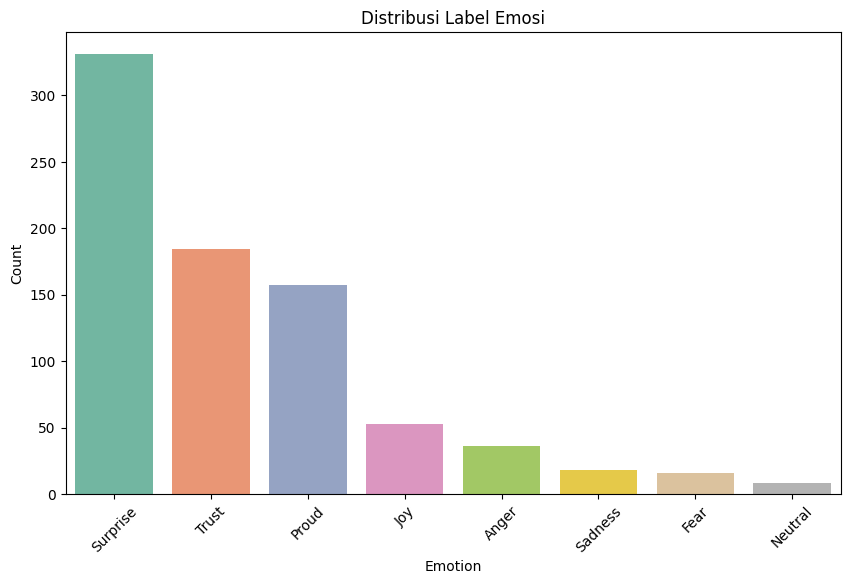

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(data=label_distribution, x="Emotion", y="Count", palette="Set2")
plt.title("Distribusi Label Emosi")
plt.xticks(rotation=45)
plt.show()

#### 7. Insight Awal

In [7]:
print("\n🔹 Insight Awal:")
print("- Dataset memiliki", len(df), "baris data")
print("- Jumlah missing values relatif kecil/besar tergantung hasil di atas")
print("- Ada", total_duplicates, "baris duplikat")
print("- Ada", video_duplicates, "URL video duplikat")
print("- Label paling dominan:", label_distribution.iloc[0,0], 
      "dengan", label_distribution.iloc[0,1], "sampel (", label_distribution.iloc[0,2], "% )")
print("- Terdapat indikasi class imbalance, terutama pada kelas minoritas (Neutral, Fear, Sadness)")


🔹 Insight Awal:
- Dataset memiliki 803 baris data
- Jumlah missing values relatif kecil/besar tergantung hasil di atas
- Ada 0 baris duplikat
- Ada 27 URL video duplikat
- Label paling dominan: Surprise dengan 331 sampel ( 41.22 % )
- Terdapat indikasi class imbalance, terutama pada kelas minoritas (Neutral, Fear, Sadness)
